In [120]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [121]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [122]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [123]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [124]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [125]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [126]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [127]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [128]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [129]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [130]:
# Find the most recent date in the data set.
most_recent = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent

('2017-08-23')

In [131]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
query_date

datetime.date(2016, 8, 23)

In [132]:
# Perform a query to retrieve the date and precipitation scores
date_prcp_data = session.query(measurement.date, measurement.prcp).\
     filter(measurement.date >= query_date).all()

In [133]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(date_prcp_data, columns=['Date', 'Precipitation'])
precip_df.set_index('Date', inplace=True, )
precip_df.head(10)

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13


In [134]:
# Sort the dataframe by date
precip_df.sort_values(by=['Date'], inplace=True)
precip_df.head(10)

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02
2016-08-24,0.08
2016-08-24,2.15


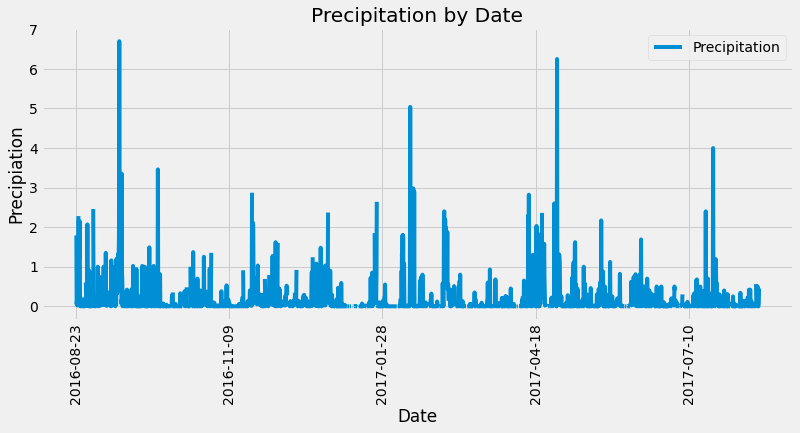

In [135]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(figsize=(12,5))
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Precipiation')
plt.title('Precipitation by Date')
plt.savefig("output_data/Precipiation.png")
plt.show()

In [136]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [137]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(measurement).group_by(measurement.station).count()
print(stations)

9


In [138]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [139]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
lowest_temp

[(54.0)]

In [140]:
highest_temp = session.query(func.max(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
highest_temp

[(85.0)]

In [141]:
average_temp = session.query(func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
average_temp

[(71.66378066378067)]

In [142]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station = session.query(measurement.tobs).\
     filter(measurement.date >= query_date).\
     filter(measurement.station == 'USC00519281')

In [143]:
# Save to DataFrame
temp_df = pd.DataFrame(active_station, columns=['tobs'])
temp_df.head(10)

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
5,73.0
6,78.0
7,77.0
8,78.0
9,80.0


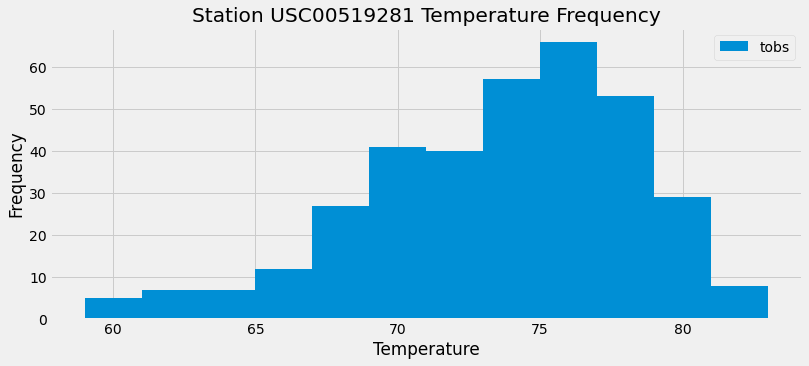

In [144]:
# Plot the results as a histogram
temp_df.plot.hist(bins=12, figsize=(12,5))
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Station USC00519281 Temperature Frequency')
plt.savefig("output_data/Temperature.png")
plt.show()

# Close session

In [145]:
# Close Session
session.close()